

---

# **Apache Pig Weekly Project-Data Cleaning[Hokage Heroes 🔥]**

---
### **Dataset:**
[Link Dataset From Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was * diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* death: indicates whether the patient died or recovered.


# Import required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data from google drive
 * Email: ccapstoneprojects@gmail.com
 * Password: Capstone12345
* [This email just for capstone Projects during bootcamp]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Covid Data.csv')
data.shape

(1048575, 21)

In [4]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

## Data Cleaning

* From the description of the the dataset we have 
* values as 97 and 99 are missing data -> So we will 
 * Change values from 97 to 99 to None
 

In [6]:
boolean_features=data.drop(columns=['AGE','DATE_DIED','MEDICAL_UNIT','CLASIFFICATION_FINAL']).columns
data2=data.copy()
for feature in boolean_features:
    data2[feature][(data[feature]>=97)&(data[feature]<=99)]=None
    print(feature,'\n',data2[feature].unique())

USMER 
 [2 1]
SEX 
 [1 2]
PATIENT_TYPE 
 [1 2]
INTUBED 
 [nan  1.  2.]
PNEUMONIA 
 [ 1.  2. nan]
PREGNANT 
 [ 2. nan  1.]
DIABETES 
 [ 2.  1. nan]
COPD 
 [ 2.  1. nan]
ASTHMA 
 [ 2.  1. nan]
INMSUPR 
 [ 2.  1. nan]
HIPERTENSION 
 [ 1.  2. nan]
OTHER_DISEASE 
 [ 2.  1. nan]
CARDIOVASCULAR 
 [ 2.  1. nan]
OBESITY 
 [ 2.  1. nan]
RENAL_CHRONIC 
 [ 2.  1. nan]
TOBACCO 
 [ 2.  1. nan]
ICU 
 [nan  2.  1.]


* The we will Create 'DEATH' column which indicates whether the patient died or recovered

In [7]:
data3=data2.copy()
data3.insert(loc=21,column='DEATH',value=0)
data3.DEATH[data3['DATE_DIED']!='9999-99-99']=1
data3.DEATH[data3['DATE_DIED']=='9999-99-99']=2
data3.DEATH.value_counts(dropna=False)

2    971633
1     76942
Name: DEATH, dtype: int64

* As we can see above the data is out of balance

### Drop useless features

In [8]:
data4=data3.copy()
data4.drop(columns=['DATE_DIED'],inplace=True)
data4.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,NaN,1.0,65,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,NaN,2.0,53,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,NaN,2.0,68,NaN,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1


### Missing Values
* we have above missing values

In [9]:
na=data4.isna().sum()[data4.isna().sum()>0]/data4.shape[0]
na

INTUBED           0.816221
PNEUMONIA         0.015262
PREGNANT          0.502840
DIABETES          0.003183
COPD              0.002864
ASTHMA            0.002841
INMSUPR           0.003246
HIPERTENSION      0.002960
OTHER_DISEASE     0.004811
CARDIOVASCULAR    0.002934
OBESITY           0.002892
RENAL_CHRONIC     0.002867
TOBACCO           0.003071
ICU               0.816377
dtype: float64

In [10]:
for feature in na.index:
    print(feature,'\b:')
    print(data4[feature].value_counts(dropna=False)/data4.shape[0])
    print('-'*50)

INTUBED :
NaN    0.816221
2.0    0.151682
1.0    0.032097
Name: INTUBED, dtype: float64
--------------------------------------------------
PNEUMONIA :
2.0    0.851188
1.0    0.133551
NaN    0.015262
Name: PNEUMONIA, dtype: float64
--------------------------------------------------
PREGNANT :
NaN    0.502840
2.0    0.489406
1.0    0.007754
Name: PREGNANT, dtype: float64
--------------------------------------------------
DIABETES :
2.0    0.877618
1.0    0.119199
NaN    0.003183
Name: DIABETES, dtype: float64
--------------------------------------------------
COPD :
2.0    0.982772
1.0    0.014364
NaN    0.002864
Name: COPD, dtype: float64
--------------------------------------------------
ASTHMA :
2.0    0.967050
1.0    0.030109
NaN    0.002841
Name: ASTHMA, dtype: float64
--------------------------------------------------
INMSUPR :
2.0    0.983240
1.0    0.013514
NaN    0.003246
Name: INMSUPR, dtype: float64
--------------------------------------------------
HIPERTENSION :
2.0 

In [11]:
data5=data4.copy()
for feature in na.index:
    data5[feature].fillna(2,inplace=True)
data5.drop(columns=['ICU','INTUBED'],inplace=True)
data5.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DEATH                   0
dtype: int64

### Duplicated Values

* check the duplicate values 
* then drop duplicate values

In [12]:
data5.duplicated().sum()

862151

In [13]:
data6=data5.drop_duplicates()
data6.duplicated().sum()

0

### Outliers

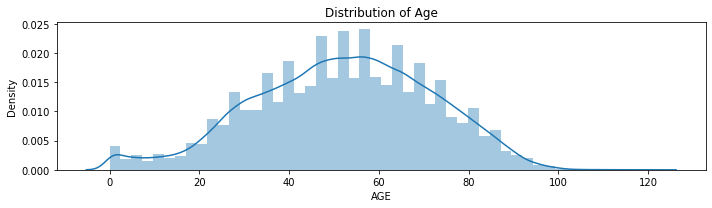

In [14]:
plt.figure(figsize=(10,3))
sns.distplot(data6.AGE)
plt.title('Distribution of Age')
plt.tight_layout()

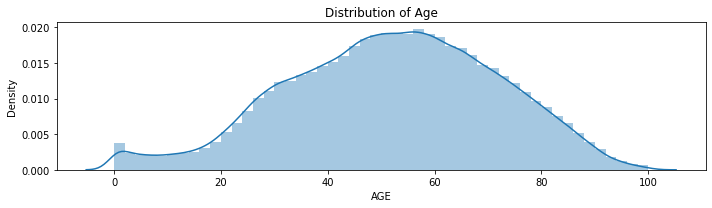

In [15]:
data7=data6[(data6.AGE<=100)&(data6.AGE>=0)]

plt.figure(figsize=(10,3))
sns.distplot(data7.AGE)
plt.title('Distribution of Age')
plt.tight_layout()

In [18]:
df = data7.reset_index()
df.head()

,index,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,2,1,1,1,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1
1,1,2,1,2,1,1.0,72,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,1
2,2,2,1,2,2,2.0,55,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1
3,3,2,1,1,1,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,1
4,4,2,1,2,1,2.0,68,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,1


## Export fina dataset after doing preprocessin to use it in Pig Script

In [19]:
df.to_csv('Covid_df.csv', index=False)